# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [2]:
import numpy as np

class LinearRegression1:
    def __init__(self, learning_rate=0.01, epochs=1000, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for i in range(self.epochs):
            y_pred = np.dot(X, self.theta)
            if self.penalty == 'L1':
                dC_dw = (1 / m) * (np.dot(X.T, (y_pred - y)) + self.alpha * np.sign(self.theta))
            elif self.penalty == 'L2':
                dC_dw = (1 / m) * (np.dot(X.T, (y_pred - y)) + self.alpha * self.theta)
            else:
                dC_dw = (1 / m) * np.dot(X.T, (y_pred - y))
            dC_db = (1 / m) * np.sum(y_pred - y)
            self.theta -= self.learning_rate * dC_dw

    def predict(self, X):
        return np.dot(X, self.theta)


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

   No  X1 transaction date  X2 house age   
0   1             2012.917          32.0  \
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores   
0                                84.87882                               10  \
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

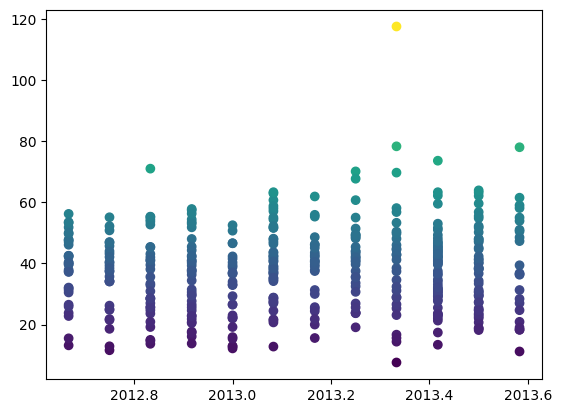

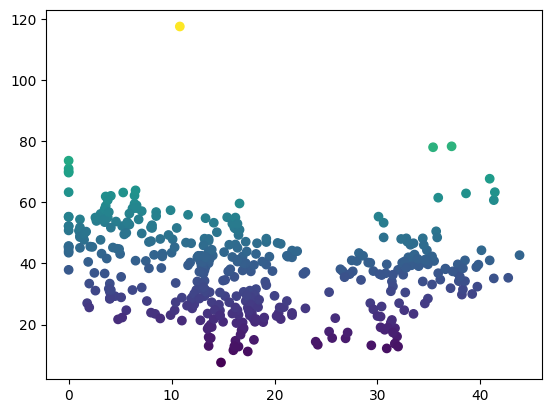

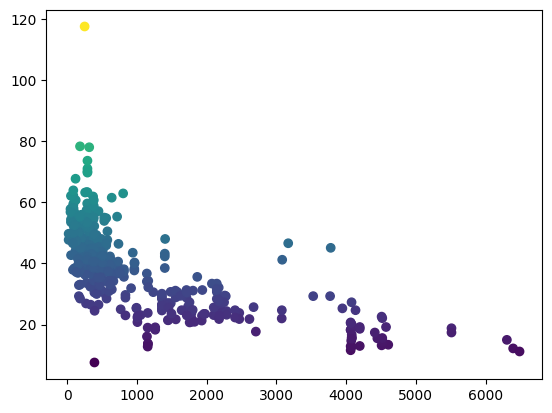

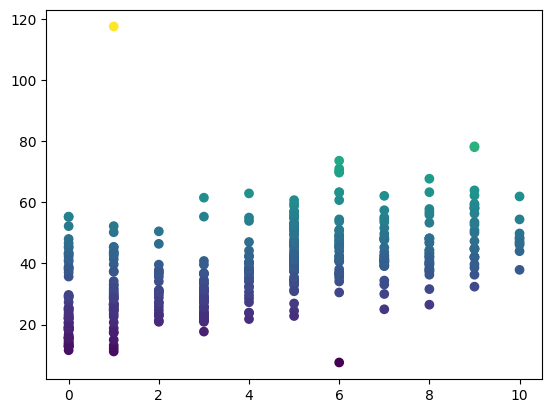

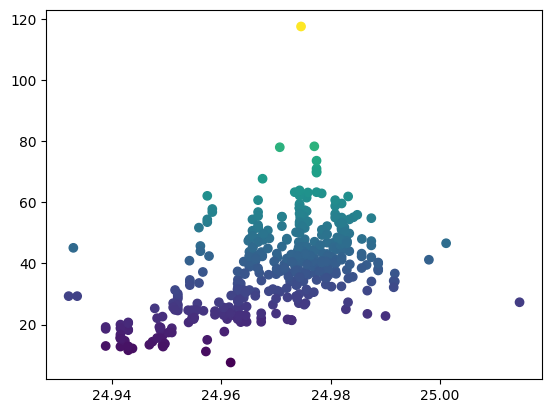

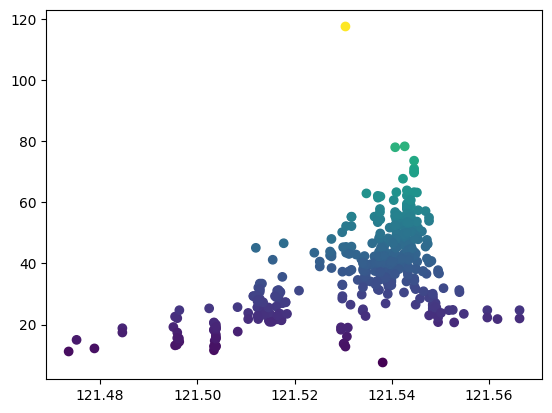

15849.679638762413
-0.09389888394678869


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
#reading the data
df= pd.read_csv("Real estate.csv")
print(df.head())

#checking for null values
df.isnull().values.any()   #output was false which means there is no missing value in the dataset

#plotting column values
df1=df.drop(['No','Y house price of unit area'],axis=1)



cols=df1.columns

for i in cols:
    plt.scatter(df1[i],df['Y house price of unit area'],c=df['Y house price of unit area'])
    plt.show() 
df=df.drop(['X1 transaction date','X3 distance to the nearest MRT station','X5 latitude','X6 longitude'],axis=1)
df2=df.drop(['No'],axis=1)
arr1=np.array(df['No'])
arr2=np.array(df2)
arr2.shape
X_train,X_test,y_train,y_test=train_test_split(arr2,arr1,test_size=0.25)

scaler=MinMaxScaler()
train_x=scaler.fit_transform(X_train)
test_x=scaler.fit_transform(X_test)




fn2=LinearRegression()
fn2.fit(X_train,y_train)

Y_pred=fn2.predict(X_test)
error=mean_squared_error(y_test,Y_pred)

print(error)
r2score=r2_score(y_test,Y_pred)
print(r2score)







# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cancer=datasets.load_breast_cancer()

df=pd.DataFrame(cancer.data, columns=[cancer.feature_names])  #created a dataframe
df['target']=cancer.target  #added a column of target in the dataframe
df1=df.drop('target',axis=1)
cols=df1.columns

dict=[]
for col in cols:
 dict.append(df1[col])

X=np.array(dict).reshape(569,30)   #created X 
y=np.array(df['target'])     #created y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

le=MinMaxScaler()
X_train=le.fit_transform(X_train)
X_test=le.fit_transform(X_test)


C:\Users\HP\AppData\Local\Temp\ipykernel_109640\4066947115.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df1=df.drop('target',axis=1)


5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [5]:
class sigmoid:
    def sigmoid(z):
        a=1.0/(1.0+ np.exp(-z))
        return a
    def derivative(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegression1:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid.sigmoid(z)
            #cross-entropy loss function
            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [6]:
log=LogisticRegression1(0.01,1000)
log.fit(X_train,y_train)
Y_pred=log.predict(X_test)
from sklearn.metrics import mean_squared_error,accuracy_score
print(mean_squared_error(y_test,Y_pred))
print(accuracy_score(y_test,Y_pred))

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
Y_pred=lg.predict(X_test)
from sklearn.metrics import mean_squared_error,accuracy_score
print(mean_squared_error(y_test,Y_pred))
print(accuracy_score(y_test,Y_pred))


0.6140350877192983
0.38596491228070173
0.3684210526315789
0.631578947368421


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred,labels=df.index))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetric

# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

glass= pd.read_csv('glass.csv')
X=np.array(glass['Type'])
glass=glass.drop('Type',axis=1)

Le=LabelEncoder()
glass['RI']=Le.fit_transform(glass['RI'])

Y=np.array(glass['RI'])
glass=glass.drop('RI',axis=1)
cols=glass.columns
for col in cols:
 glass[col]=Le.fit_transform(glass[col])
 Y=np.append(Y,glass[col])

Y=Y.reshape(214,9)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_train=np.array(X_train).reshape(-1,1)


X_test=np.array(X_test).reshape(-1,1)

Y_test=np.array(Y_test).reshape(-1,1)



7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neig=KNeighborsClassifier(n_neighbors=3)

Neig.fit(X_train,Y_train)
y_pred=Neig.predict(X_test)

y_pred=np.array(y_pred).reshape(585,1)

print(accuracy_score(Y_test,y_pred))

0.20683760683760682

9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

0.2222222222222222


[Text(0.5555555555555556, 0.875, 'x[0] <= 4.0\ngini = 0.956\nsamples = 149\nvalue = [[26, 1, 1, 4, 1, 2, 1, 2, 3, 2, 1, 3, 2, 1\n 1, 1, 2, 4, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2\n 2, 2, 4, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 4\n 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1\n 3, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1\n 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]\n[28, 2, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 1, 5\n 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 1\n 1, 1, 1, 5, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1\n 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1\n 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1\n 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0]\n[29, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1\n 1, 3, 5, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2\n 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 3\n 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1\n 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1\n 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]\n[26, 1, 2, 2, 1, 1, 2, 1, 1, 2, 4, 2, 1, 1\n 4, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1\n 4, 2, 1, 2, 2, 2, 4, 1, 1, 2, 2, 1, 2, 3\n 1, 3, 1, 1, 1

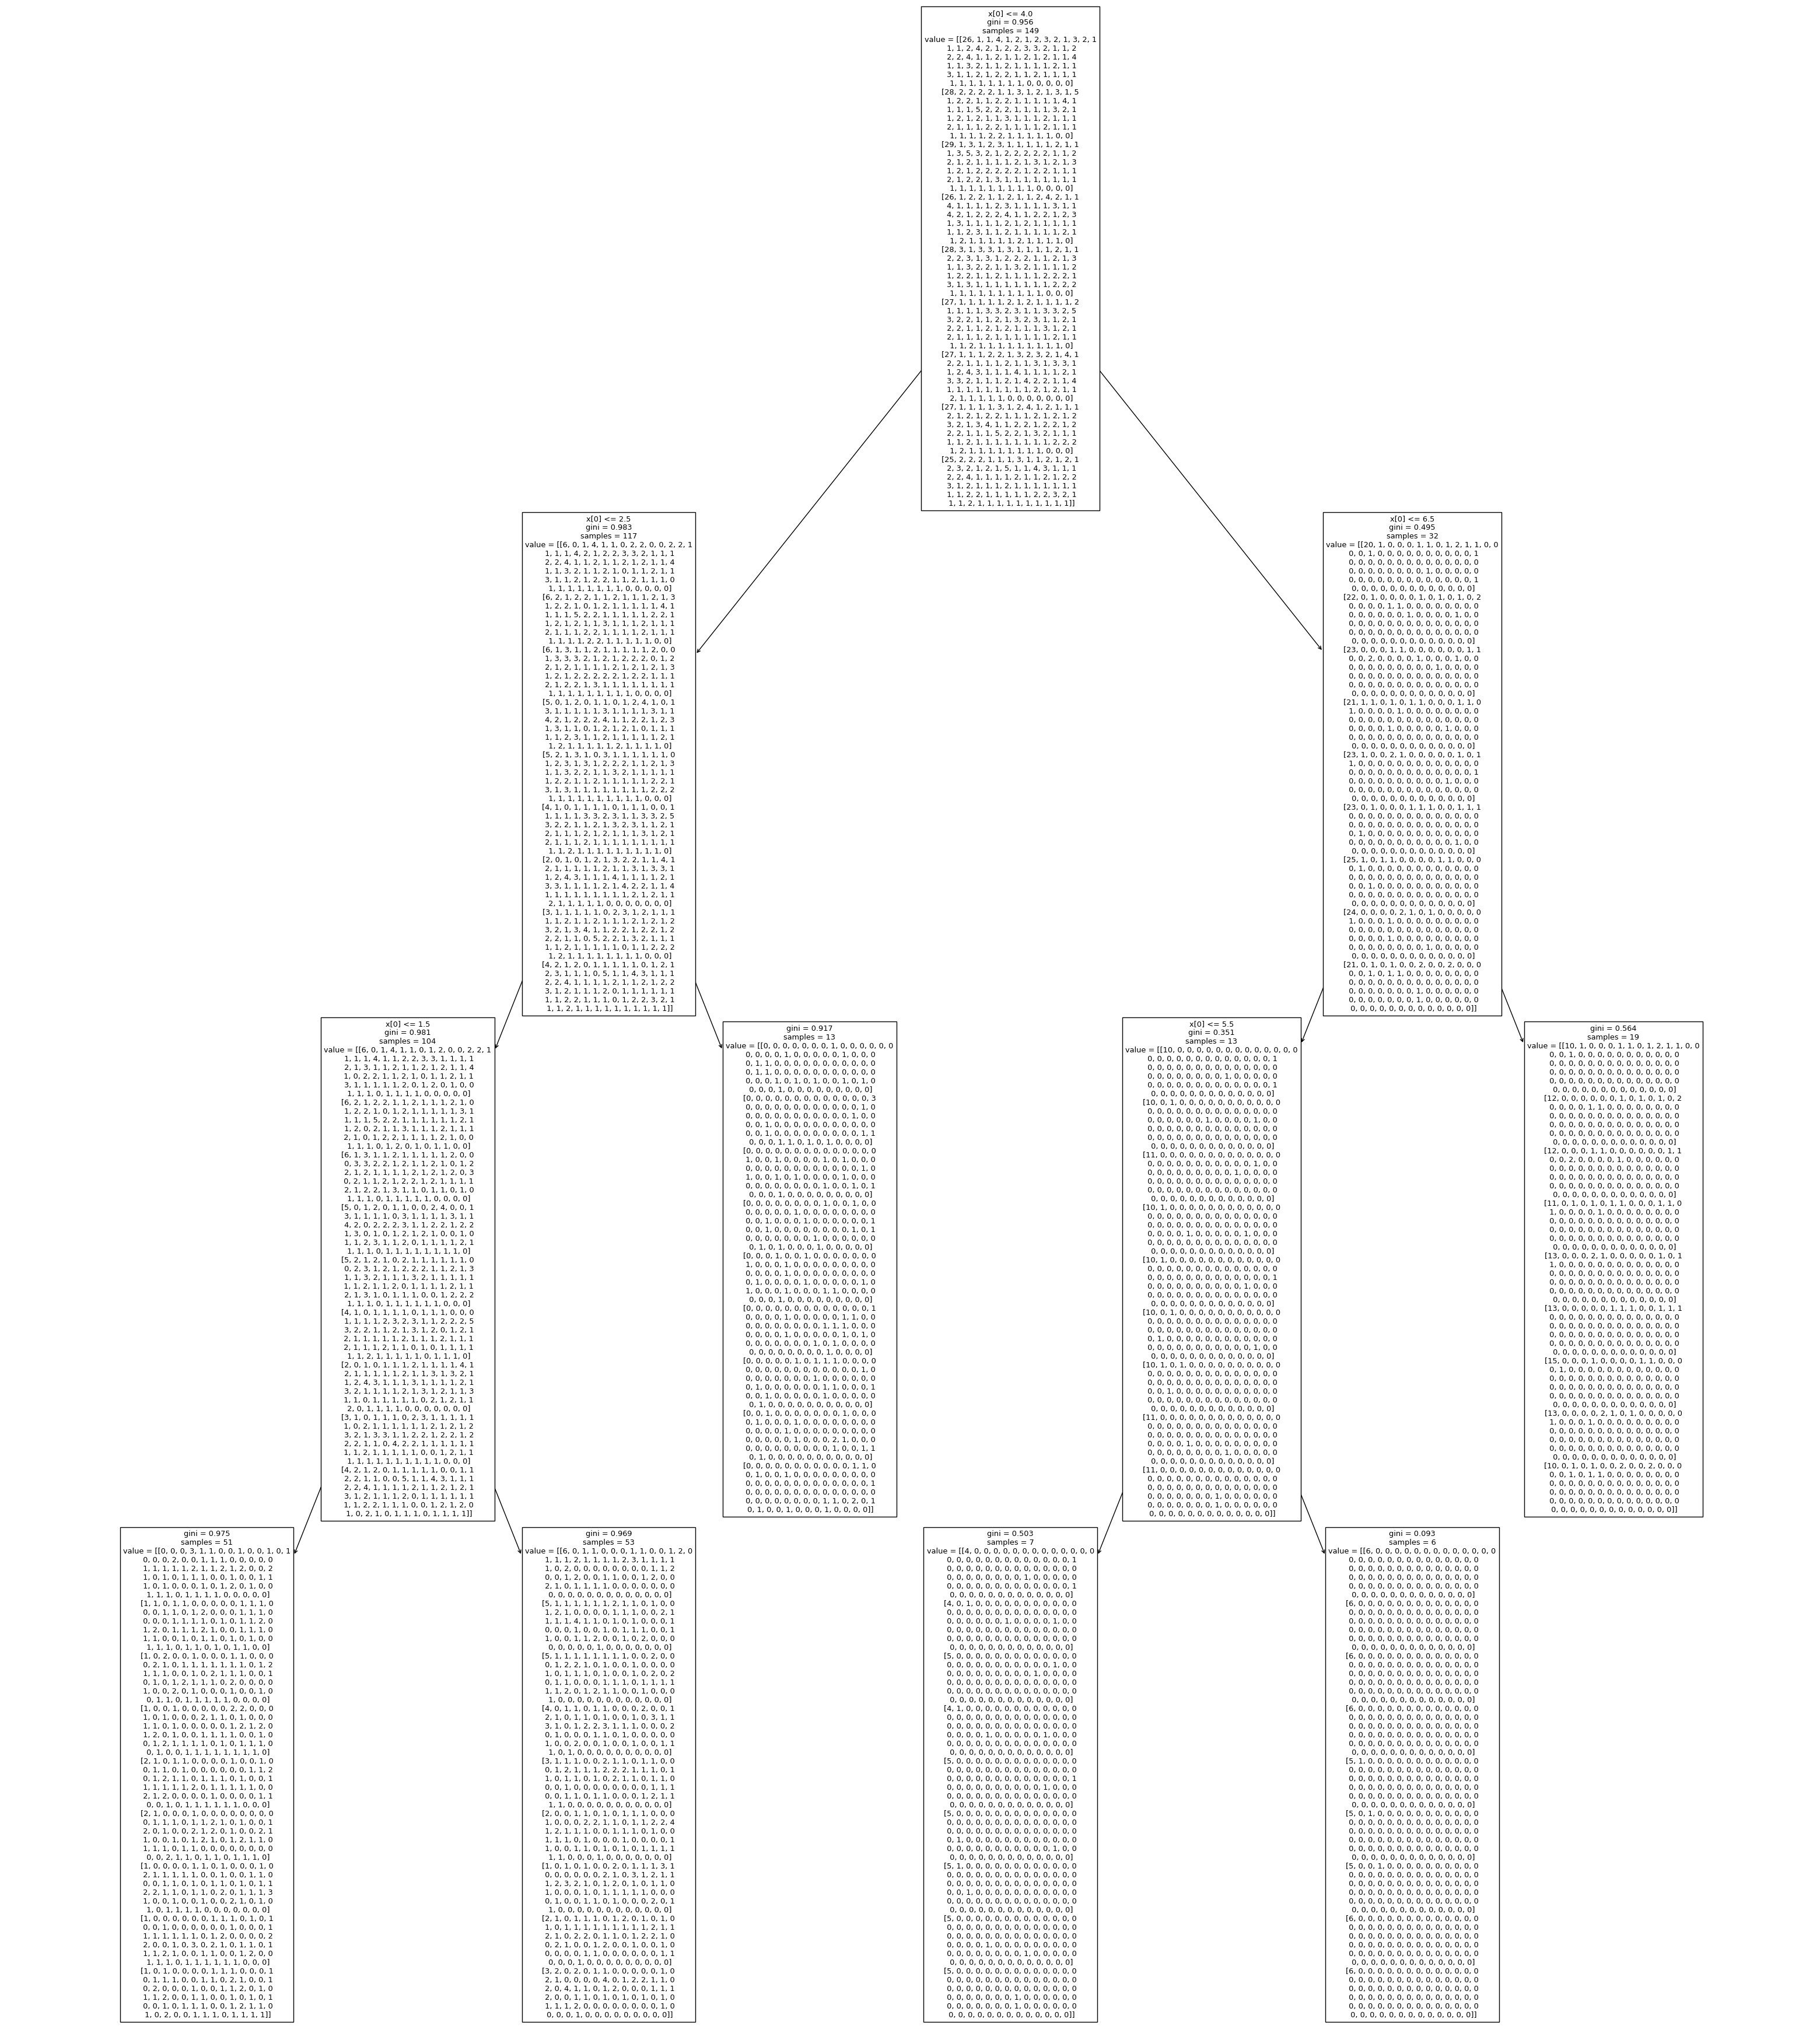

In [29]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree1=DecisionTreeClassifier(max_depth=7)
tree1.fit(X_train,Y_train)
y1_pred=tree1.predict(X_test)
y1_pred=np.array(y1_pred).reshape(585,1)

print(accuracy_score(Y_test,y1_pred))
plt.figure(figsize=(40,45))
plot_tree(tree1,)
